# Q1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Lab4.1.csv')
x = df['Temp'].values
y = df['Yield'].values

In [3]:
def linear(x,y):
    xm = np.mean(x)
    ym = np.mean(y)
    num = np.sum((x-xm)*(y-ym))
    den = np.sum((x-xm)**2)
    b1 = num/den
    b0 = ym-b1*xm
    return b0,b1

b0,b1  =linear(x,y)

In [4]:
def lin_reg_matrix(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_x2 = np.sum(x ** 2)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    
    A = np.array([[n, sum_x], [sum_x, sum_x2]])
    B = np.array([sum_y, sum_xy])
    
    A_inv = np.linalg.inv(A)
    coef = A_inv @ B
    b0, b1 = coef
    return b0, b1

b0_lm, b1_lm = lin_reg_matrix(x, y)

In [5]:
def poly_reg(x, y):
    n = len(x)
    X = x

    mat1 = np.array([
        [n, np.sum(X), np.sum(X**2)],
        [np.sum(X), np.sum(X**2), np.sum(X**3)],
        [np.sum(X**2), np.sum(X**3), np.sum(X**4)]
    ])
    
    mat2 = np.array([
        [np.sum(y)],
        [np.sum(X * y)],
        [np.sum((X**2) * y)]
    ])

    coeffs = np.linalg.solve(mat1, mat2)
    b0, b1, b2 = coeffs.flatten()

    y_pred = b0 + b1 * X + b2 * (X**2)
    sq_err = (y - y_pred)**2
    rmse = np.sqrt(np.mean(sq_err))
    
    return b0, b1, b2, y_pred, rmse

b0_pm, b1_pm, b2_pm, y_pred_pm, rmse_pm = poly_reg(x, y)

In [6]:
def predict_lin(x, b0, b1):
    return b0 + b1 * x

y_pred_lm = predict_lin(x, b0_lm, b1_lm)

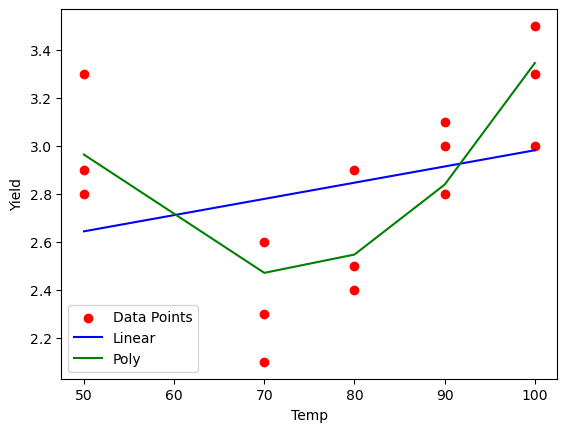

In [7]:
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x, y_pred_lm, color='blue', label='Linear')
plt.plot(x, y_pred_pm, color='green', label='Poly')
plt.xlabel('Temp')
plt.ylabel('Yield')
plt.legend()

plt.show()

In [8]:
def calc_errors(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return mse, rmse

mse_lm, rmse_lm = calc_errors(y, y_pred_lm)
mse_pm, rmse_pm = calc_errors(y, y_pred_pm)

In [9]:
print(f"L: b0 = {b0_lm}, b1 = {b1_lm}")
print(f"P: b0 = {b0_pm}, b1 = {b1_pm}, b2 = {b2_pm}")

print(f"MSE (L) {mse_lm}")
print(f"RMSE (L): {rmse_lm}")

print(f"MSE (P): {mse_pm:.2f}")
print(f"RMSE (P): {rmse_pm}")

L: b0 = 2.306306306306297, b1 = 0.00675675675675691
P: b0 = 7.960481099654975, b1 = -0.1537113402061471, b2 = 0.0010756013745701933
MSE (L) 0.1327087087087086
RMSE (L): 0.3642920651190588
MSE (P): 0.05
RMSE (P): 0.21859700508015076


# Q2

In [10]:
df2 = pd.read_csv('Lab4.2.csv')
y = df2['Infarc'].values
x1 = df2['Area'].values
x2 = df2['X2'].values
x3 = df2['X3'].values

In [11]:
def mul_reg(y, x1, x2, x3):
    n = len(y)
    
    sum_y = np.sum(y)
    sum_x1_y = np.sum(x1 * y)
    sum_x2_y = np.sum(x2 * y)
    sum_x3_y = np.sum(x3 * y)
    
    sum_x1 = np.sum(x1)
    sum_x1_x1 = np.sum(x1 * x1)
    sum_x1_x2 = np.sum(x1 * x2)
    sum_x1_x3 = np.sum(x1 * x3)
    
    sum_x2 = np.sum(x2)
    sum_x2_x2 = np.sum(x2 * x2)
    sum_x2_x3 = np.sum(x2 * x3)
    
    sum_x3 = np.sum(x3)
    sum_x3_x3 = np.sum(x3 * x3)


    mat1 = np.array([
        [n, sum_x1, sum_x2, sum_x3],
        [sum_x1, sum_x1_x1, sum_x1_x2, sum_x1_x3],
        [sum_x2, sum_x1_x2, sum_x2_x2, sum_x2_x3],
        [sum_x3, sum_x1_x3, sum_x2_x3, sum_x3_x3]
    ])
    
    mat2 = np.array([
        [sum_y],
        [sum_x1_y],
        [sum_x2_y],
        [sum_x3_y]
    ])
    
    coeffs = np.linalg.solve(mat1, mat2)
    b0, b1, b2, b3 = coeffs.flatten()
    
    y_pred = b0 + b1 * x1 + b2 * x2 + b3 * x3
    
    squared_err = (y - y_pred) ** 2
    mse = np.mean(squared_err)
    rmse = np.sqrt(mse)
    
    return b0, b1, b2, b3, y_pred, mse, rmse

In [12]:
b0, b1, b2, b3, y_pred, mse, rmse = mul_reg(y, x1, x2, x3)
b0, b1, b2, b3, mse, rmse

(-0.13453637823601106,
 0.6126549752681948,
 -0.24348223339582012,
 -0.06565569473887087,
 0.017028422624564197,
 0.13049299837372194)

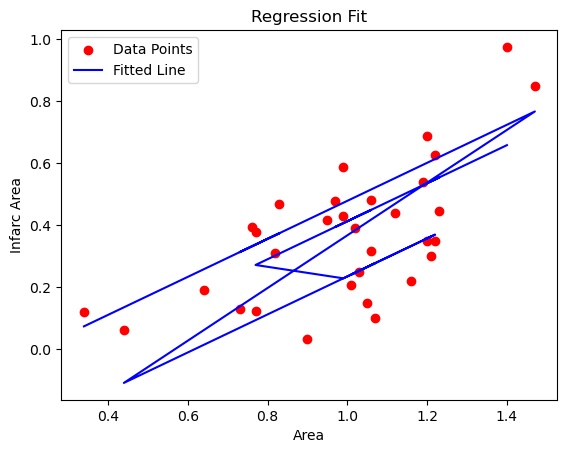

In [13]:
plt.scatter(x1, y, color='red', label='Data Points')
plt.plot(x1, y_pred, color='blue', label='Fitted Line')
plt.xlabel('Area')
plt.ylabel('Infarc Area')
plt.title('Regression Fit')
plt.legend()

plt.show()